In [72]:
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import functional as F
import torchvision.transforms as transforms
from PIL import Image as Image
import matplotlib.pyplot as plt
import os

In [73]:
class Dataset(Dataset):
    def __init__(self, dir, transform=None):
        self.dir = dir
        self.image_list = os.listdir(dir) 
        print(self.image_list)
        self.transform = transform
    def __len__(self):
        return len(self.image_list)

    def __getitem__(self,index):
        image = Image.open(os.path.join(self.dir,self.image_list[index]))
        if self.transform:        
            image = self.transform(image)
        else:
            image = F.to_tensor(image)

        return image

In [88]:
my_transform = transforms.Compose([
    transforms.RandomCrop(400),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor()
])
dataset = Dataset(dir="./img",transform=my_transform)
dataloader = DataLoader(dataset=dataset,
                          batch_size=1, shuffle=True)

['(1).jpg', '(2).jpg', '(3).jpg']


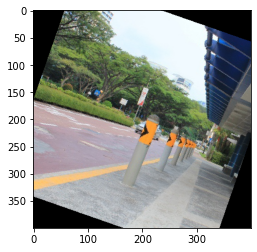

In [92]:
for epoch in range(5):
    for i,(image) in enumerate(dataloader):
        plt.imshow(image[0].permute(1, 2, 0))

##### Try other transform method. 
##### Ref: https://pytorch.org/vision/stable/transforms.html
